inserting data

In [2]:
import pandas as pd


df = pd.read_csv("F:/Downloads/archive/imdb_top_1000.csv")



fixing data

In [5]:

df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')


df['Gross'] = df['Gross'].astype(str).str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')


df_cleaned = df.dropna(subset=['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross'])


EDA

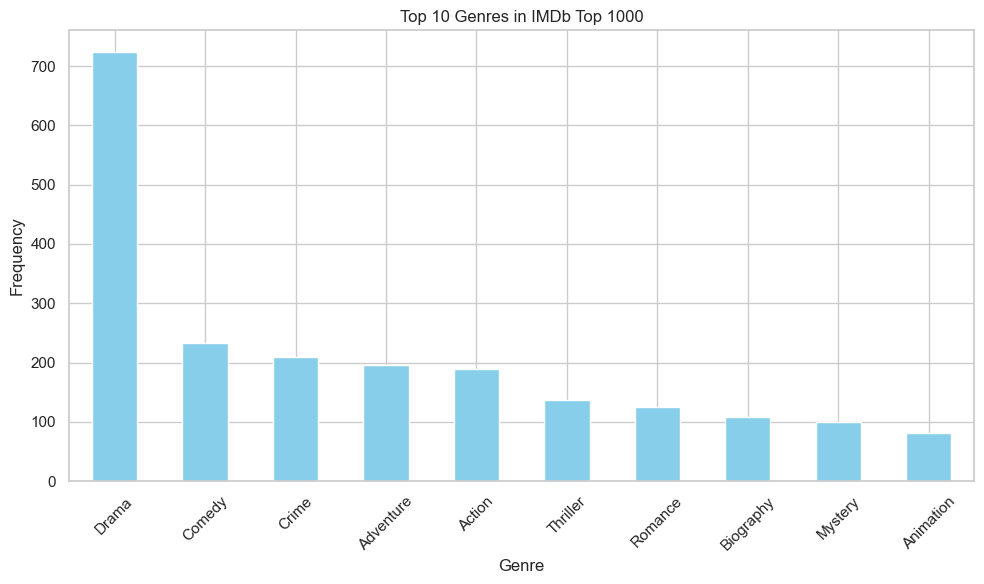

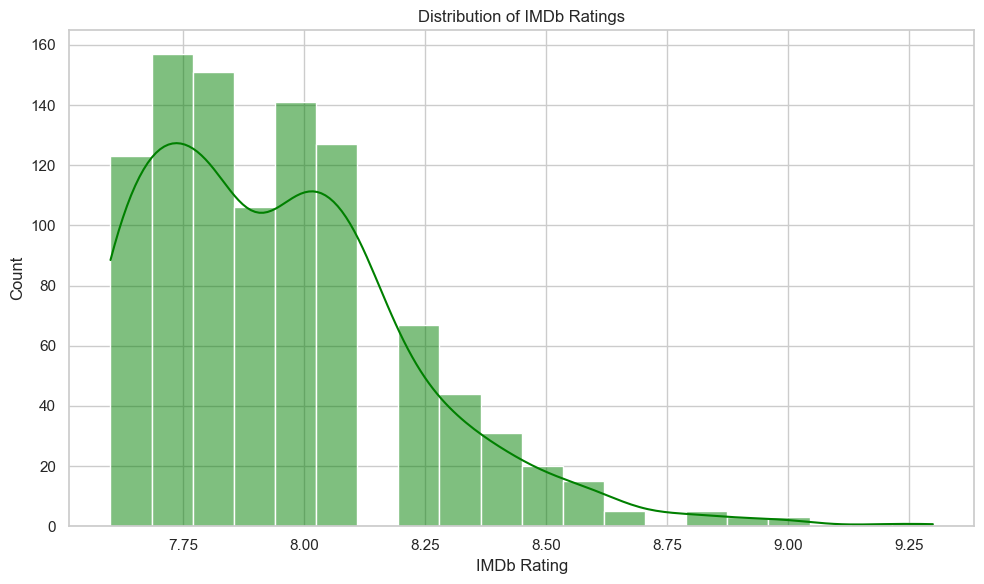

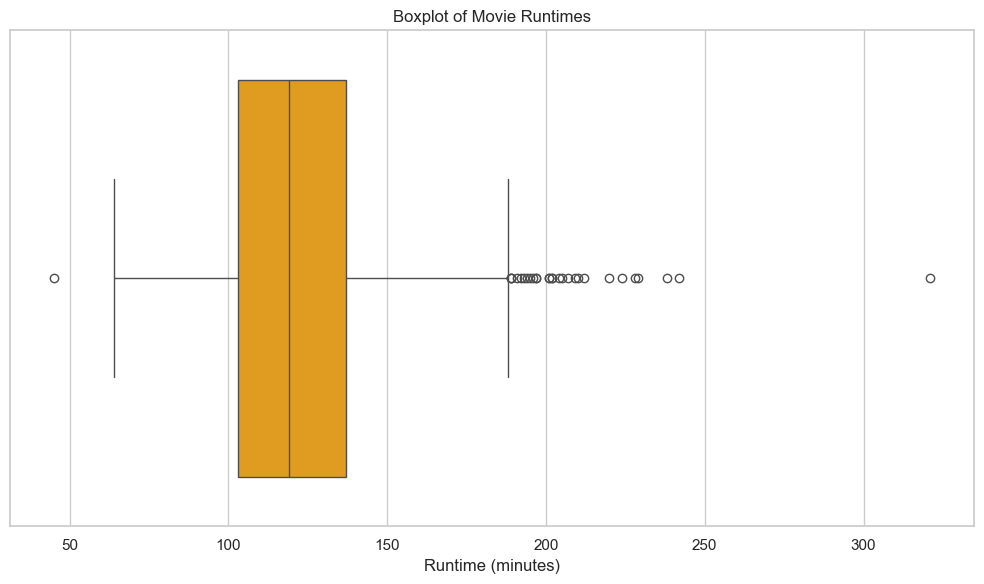

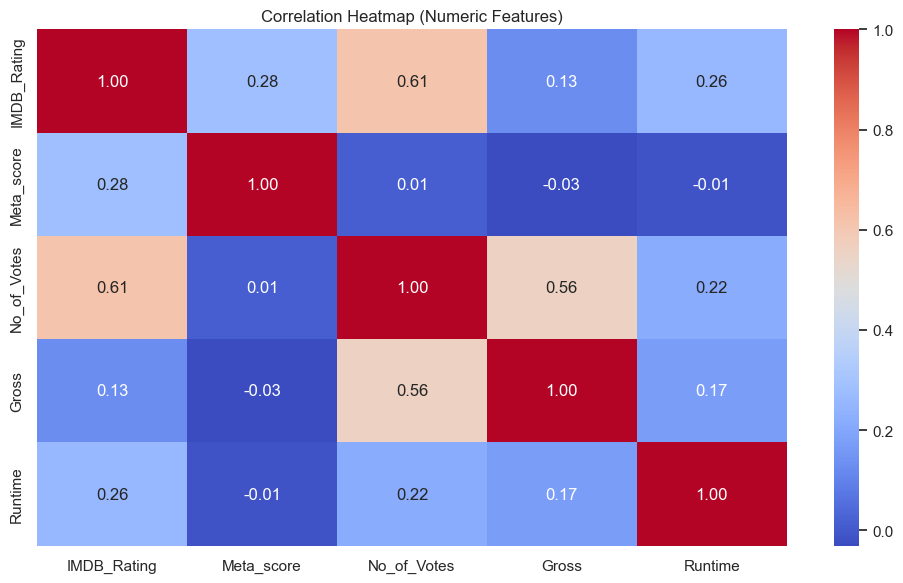

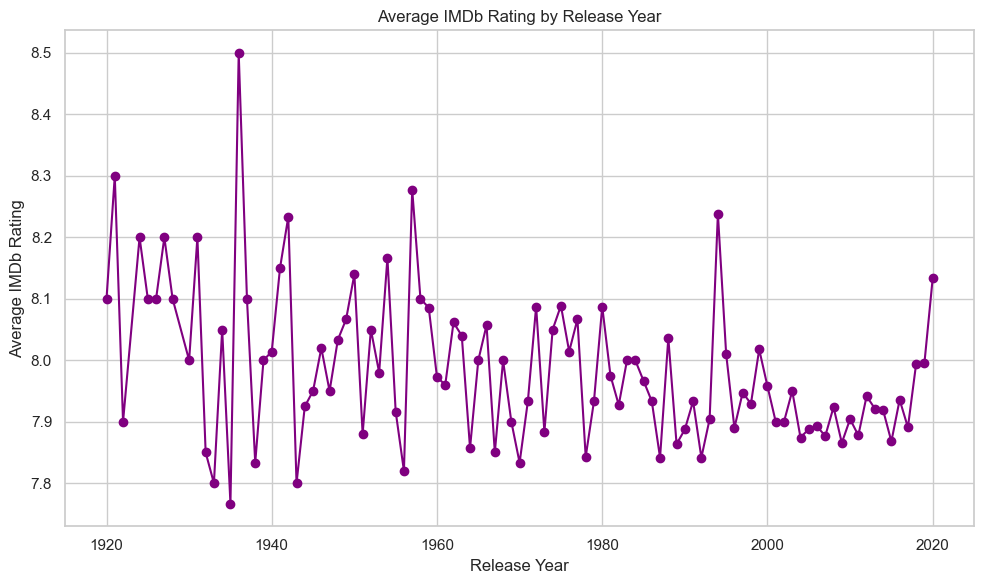

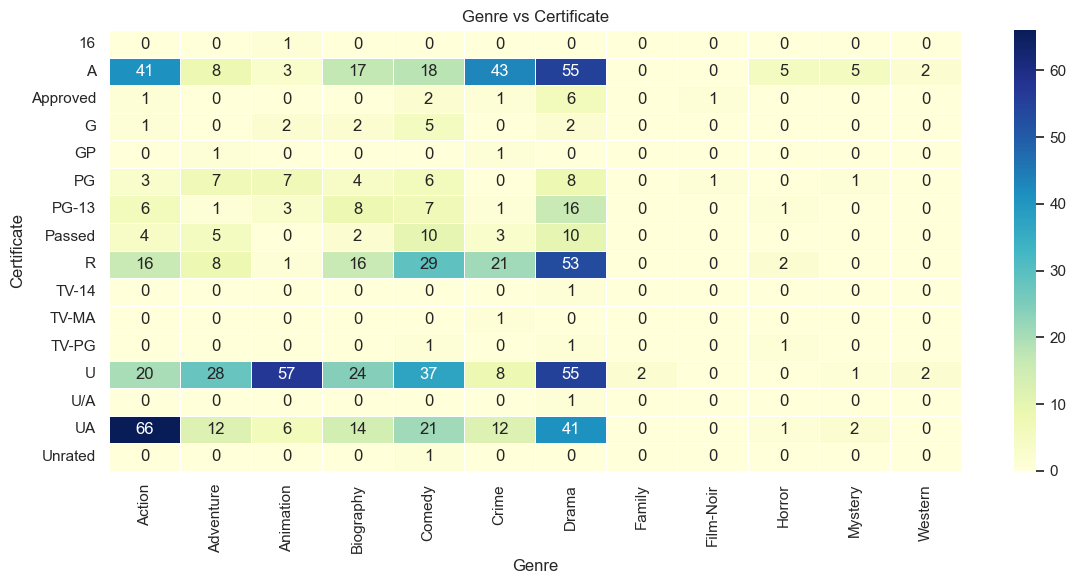

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns





top_genres = df['Genre'].str.split(', ', expand=True).stack().value_counts().head(10)

rating_dist = df['IMDB_Rating']


runtime_box = df['Runtime']


corr = df_cleaned[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime']].corr()

yearly_rating = df.groupby('Released_Year')['IMDB_Rating'].mean().dropna()

genre_certificate = pd.crosstab(df['Certificate'], df['Genre'].str.split(',').str[0])


sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

plt.figure()
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres in IMDb Top 1000')
plt.ylabel('Frequency')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure()
sns.histplot(rating_dist, bins=20, kde=True, color='green')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


plt.figure()
sns.boxplot(x=runtime_box, color='orange')
plt.title('Boxplot of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.tight_layout()
plt.show()

plt.figure()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features)')
plt.tight_layout()
plt.show()


plt.figure()
yearly_rating.plot(kind='line', marker='o', color='purple')
plt.title('Average IMDb Rating by Release Year')
plt.ylabel('Average IMDb Rating')
plt.xlabel('Release Year')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(genre_certificate, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d')
plt.title('Genre vs Certificate')
plt.xlabel('Genre')
plt.ylabel('Certificate')
plt.tight_layout()
plt.show()
